In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#importing dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<AxesSubplot:>

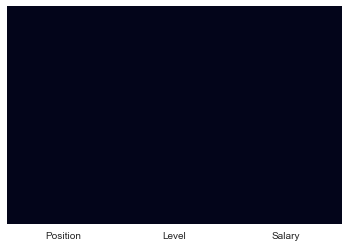

In [5]:
#check is there any null values in dataset
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [6]:
dataset.isnull().sum()
#there is no null value in the dataset

Position    0
Level       0
Salary      0
dtype: int64

Note:
Because for each position we have a specific level so instead of position we will consider Level.


Note:
Because dataset has only 10 rows we will not split that to training and test set.

In [7]:
X = dataset.iloc[:,1].values

In [8]:
Y = dataset.iloc[:,-1].values

In [10]:
X = X.reshape((len(X),1))
Y = Y.reshape((len(Y),1))

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [14]:
#training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,Y)

C:\Users\poya system\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [16]:
#predict a new result
predicted_value = sc_Y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])
print(predicted_value)

[[170370.0204065]]


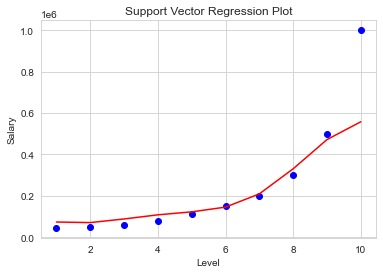

In [17]:
#visualizing SVR result
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color = 'blue')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform([regressor.predict(X)]).reshape(len(Y),1),color = 'red')
plt.title('Support Vector Regression Plot')
plt.ylabel('Salary')
plt.xlabel('Level')
plt.show()

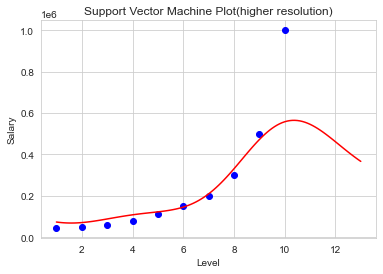

In [25]:
#visualizing SVR for higher resolution
x_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(Y)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color = 'blue')
plt.plot(x_grid,sc_Y.inverse_transform([regressor.predict(sc_X.transform(x_grid))]).reshape(len(x_grid),1),color = 'red')
plt.title('Support Vector Machine Plot(higher resolution)')
plt.ylabel('Salary')
plt.xlabel('Level')
plt.show()